# HW2: Exploratory Data Analysis on an insurance spending dataset


## Learning the data using visualization and a simple linear regression

1. First, run the example and understand the ML process and be familir with Python package functions for simple linear regression. 

2. Apply exploratory data analysis and simple regression on the insurance data:   'insurance.csv'

#### Write your name

- Garland Lau 


###  Simple Linear Regression example

Follow the code and observe the results

In [2]:
# you need   Python ≥3.5 
import sys
assert sys.version_info >= (3, 5)

In [3]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

===============================

In [4]:
import pandas as pd   
import numpy as np    
import matplotlib.pyplot as plt 
import seaborn as sns
import time
import warnings
warnings.filterwarnings("ignore")
##############################################
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,2320.00
1,18,male,33.770,1,no,southeast,2506.10
2,28,male,33.000,3,no,southeast,2512.00
3,33,male,22.705,0,no,northwest,2124.15
4,32,male,28.880,0,no,northwest,2407.40


In [5]:
# To plot  figures directly within Jupyter
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### Plot scatterplot and the regression function

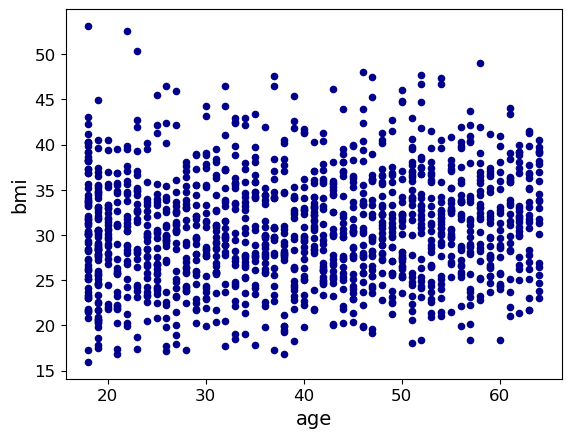

In [6]:
# Code example of load the data and prepared the data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
ax1 = df.plot.scatter(x='age',
                      y='bmi',
                      c='DarkBlue')
plt.show()

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# split the data into train and test parts
train_df, test_df = train_test_split(df,shuffle = True, test_size = 0.15, random_state=17)
# show descriptive charachteristics of the dataset such as min, max median

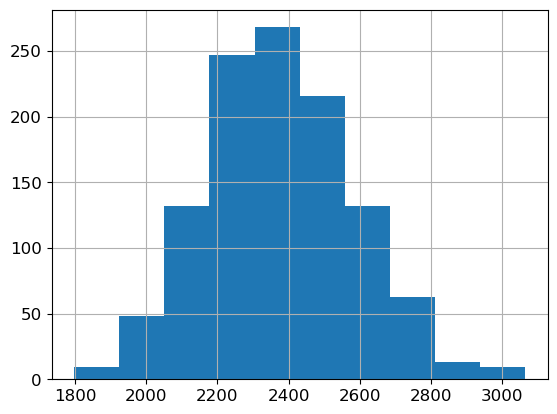

<Axes: >

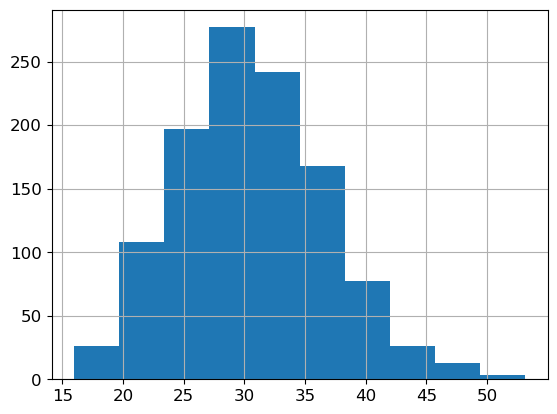

In [8]:

train_df['charges'].hist()
plt.show()
train_df['bmi'].hist()

In [9]:
numerical_features=list(train_df.columns)
print(numerical_features)
short_list_features = ['age', 'bmi', 'children', 'charges']
print(short_list_features)

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
['age', 'bmi', 'children', 'charges']


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

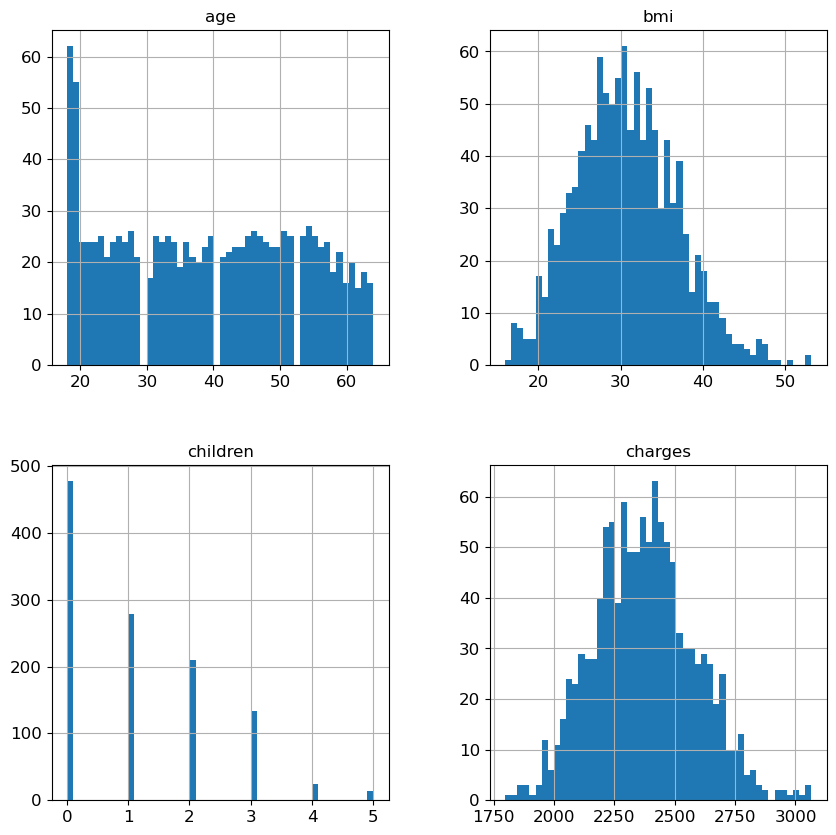

In [10]:
train_df[short_list_features ].hist(bins=50, figsize=(10, 10))

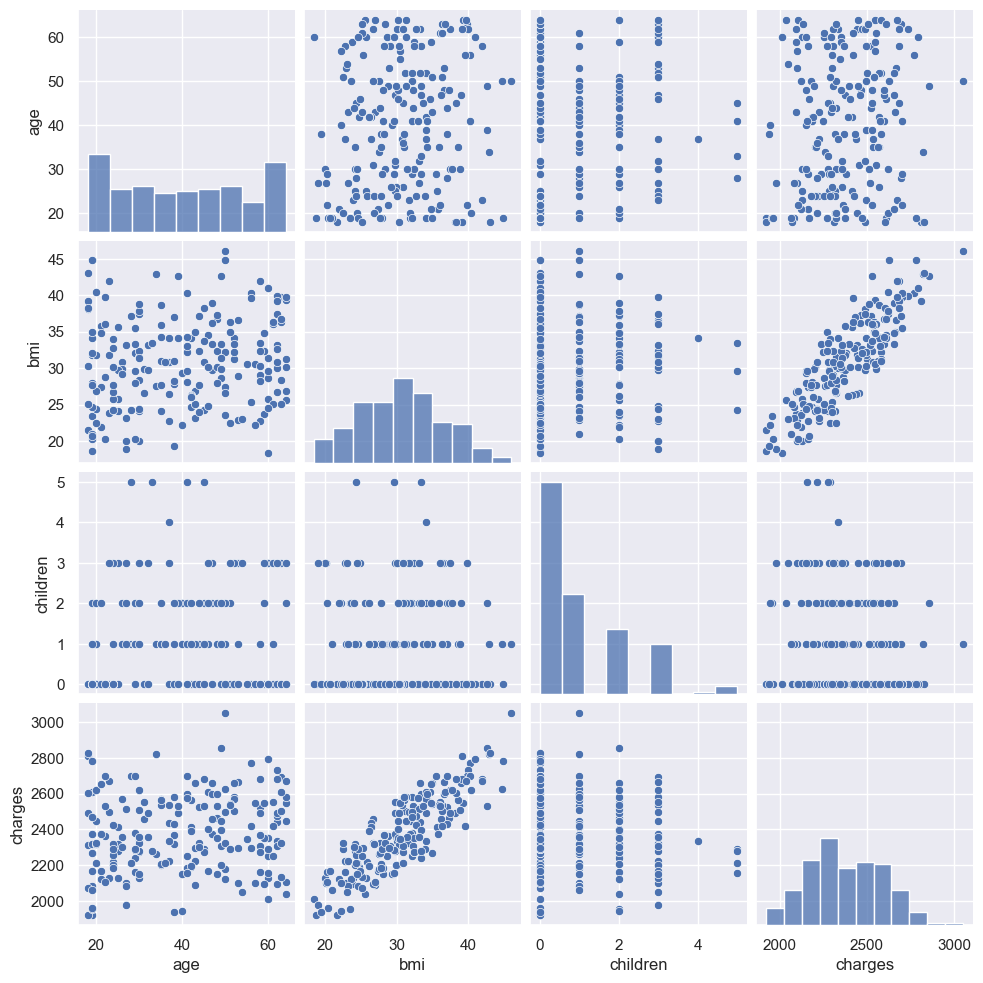

In [11]:
sns.set()
sns.pairplot(test_df[short_list_features])

0.7437862976848658


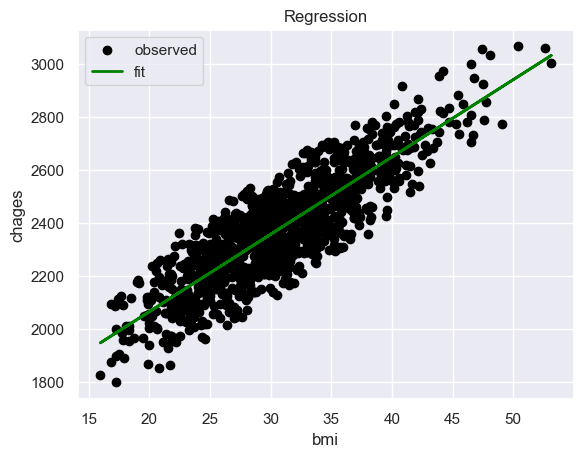

In [12]:
# Scikit-Learn ≥0.20 is required
import sklearn
from sklearn import linear_model
# Select a linear model
import numpy as np
from sklearn.linear_model import LinearRegression

X= train_df['bmi']
y = train_df['charges']
X2= np.array(X).reshape(-1,1) # reshape(-1,1) makes the array horizontal, y is vertical
    
# Train the model (we use all data for training --> 
model = sklearn.linear_model.LinearRegression()
model.fit(X2, y)
r_sq = model.score(X2, y)
print(r_sq)
plt.scatter(X2, y, color='black', label='observed')

plt.plot(X2, model.predict(X2), label='fit', color='Green', linewidth=2)

plt.xlabel('bmi')
plt.ylabel('chages')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

In [13]:
# Make a prediction
X3= test_df['bmi']
 
X3= np.array(X3).reshape(-1,1)
# what is the charges for element 44 of the test bmi list. 
predicted_charge = model.predict([X3[44]])
print('bmi= {:.2f}   predicted charge = {:.2f}'.format(X3[44][0], predicted_charge[0]))


bmi= 37.29   predicted charge = 2568.86


### Assignment


###  Part 1: Explore insight of the data using other visualization tools


'Real estate.csv'




### Tasks

1. Select attributes (columns) you are interested .
2. Conduct exploratory data analysis on the selected data and visualize the data. This may include the following but not limited: (Data should be cleaned. For example, zeros in inapropriate locations should be replaced by mean or median values.)

(a) The mean, median and standard deviation

(b) Draw boxplots

(c) Draw histograms

(c) Draw scatter plots

(d) simple linear regression function with a scatter plot

#  Real Estate Prediction

In [14]:
# Column's Selected
## House Age 
## Bus Station
## Price Per SQ Feet
data = pd.read_csv('Real estate.csv')
X1 = data['X1 transaction date'] 
X2 = data['X2 house age']
X3 = data['X3 bus station']
X4 = data['X4 number of stores']
X5 = data['X5 latitude']
X6 = data['X6 longitude']
y = data['Y price sq feet']

In [15]:
# A
# The mean, median and standard deviation
print('House Age Statistics')
print(f'Mean: {X2.mean()}')
print(f'Median: {X2.median()}')
print(f'Std Dev: {X2.std()}')
print('\n')

print('Bus Station Statistics')
print(f'Mean: {X3.mean()}')
print(f'Median: {X3.median()}')
print(f'Std Dev: {X3.std()}')
print('\n')

print('Price SQ Feet Statistics')
print(f'Mean: {y.mean()}')
print(f'Median: {y.median()}')
print(f'Std Dev: {y.std()}')
print('\n')



House Age Statistics
Mean: 17.71256038647343
Median: 16.1
Std Dev: 11.392484533242536


Bus Station Statistics
Mean: 1083.8856889130436
Median: 492.2313
Std Dev: 1262.1095954078514


Price SQ Feet Statistics
Mean: 97.75410628019323
Median: 99.35
Std Dev: 12.850455566991933




Text(0.5, 1.0, 'Price SQ Feet Summary')

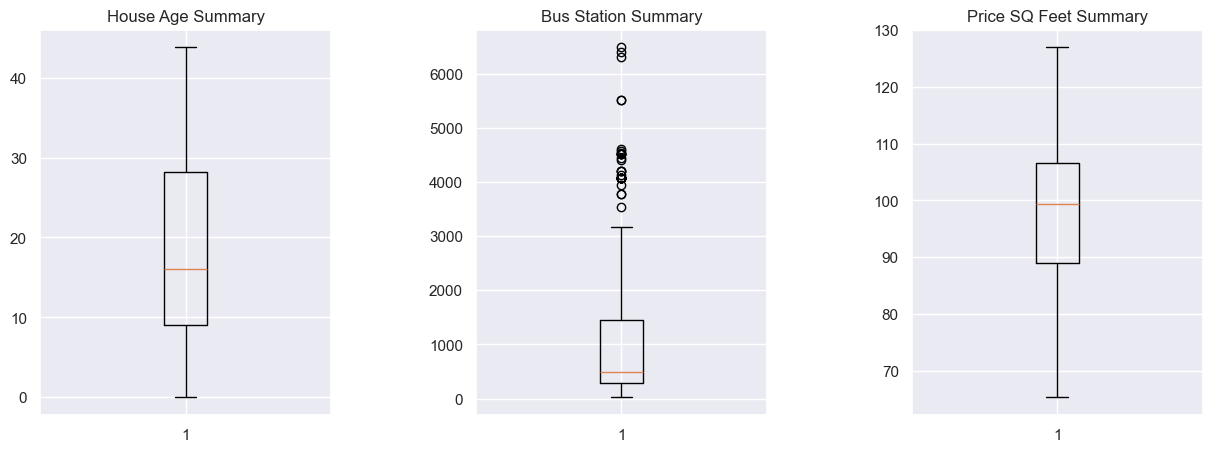

In [16]:
# B
# Draw boxplots
fig, plt_table = plt.subplots(1, 3, figsize=(15, 5))
fig.subplots_adjust(wspace=0.5)

plt_table[0].boxplot(X2)
plt_table[0].set_title('House Age Summary') 
plt_table[1].boxplot(X3)
plt_table[1].set_title('Bus Station Summary')
plt_table[2].boxplot(y)
plt_table[2].set_title('Price SQ Feet Summary')

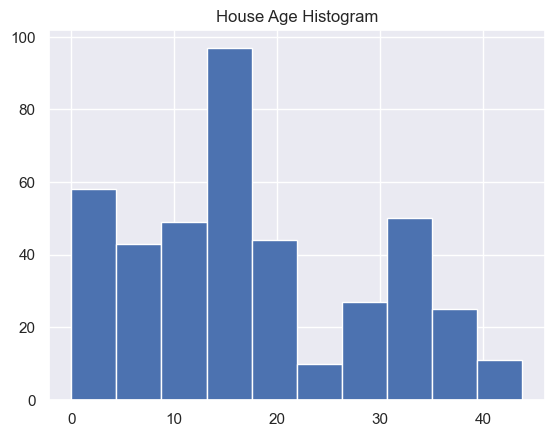

In [17]:
# C
# Draw histograms
# House Age
fig, axis = plt.subplots(1, 1)
axis.hist(X2, bins = 10)
plt.title('House Age Histogram')
plt.show()

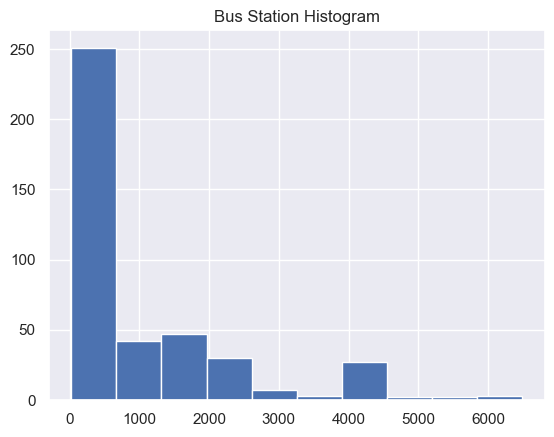

In [18]:
# C
# Draw histograms
# Bus Station
fig, axis = plt.subplots(1, 1)
axis.hist(X3, bins = 10)
plt.title('Bus Station Histogram')
plt.show()

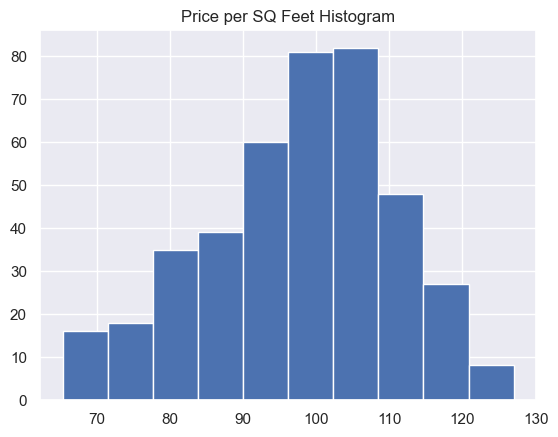

In [19]:
# C
# Draw histograms
# Price SQ Feet
fig, axis = plt.subplots(1, 1)
axis.hist(y, bins = 10)
plt.title('Price per SQ Feet Histogram')
plt.show()

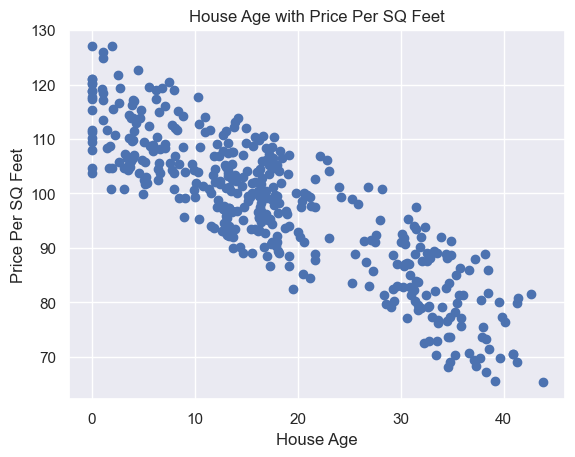

In [20]:
# D
# Draw scatter plots
# House Age with Price
plt.title("House Age with Price Per SQ Feet")
plt.xlabel('House Age')
plt.ylabel('Price Per SQ Feet')
plt.scatter( X2, y)


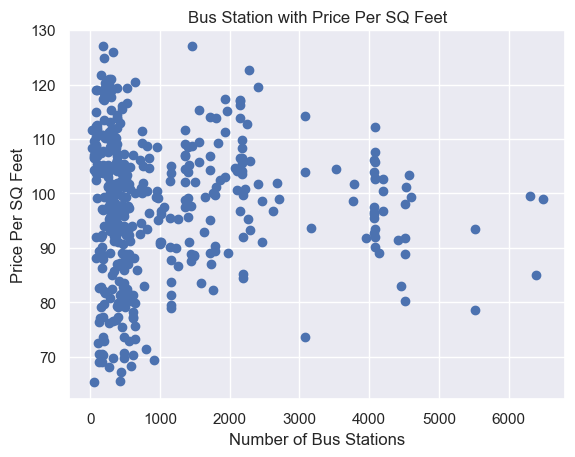

In [21]:
# D
# Draw scatter plots
# Bus Station with Price
plt.title("Bus Station with Price Per SQ Feet")
plt.xlabel("Number of Bus Stations")
plt.ylabel("Price Per SQ Feet")
plt.scatter(X3 , y)


0.748125632157661


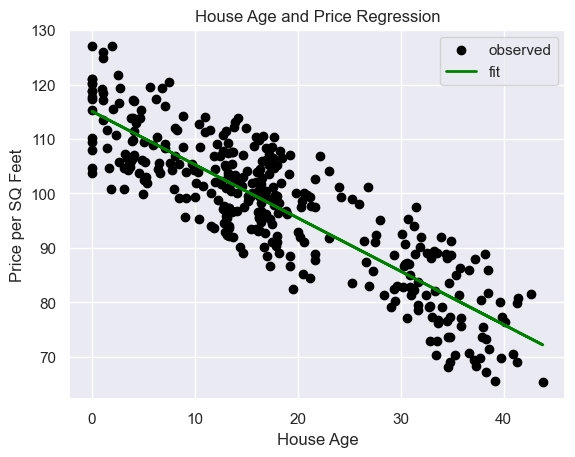

In [22]:
# E
# Linear Regression of Bus Station / Price
import sklearn
from sklearn import linear_model
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split

# split the data into train and test parts

train_df, test_df = train_test_split(data,shuffle = True, test_size = 0.15, random_state=17)

X = train_df['X2 house age']
y = train_df['Y price sq feet']
# reshape(-1,1) makes the array horizontal, y is vertical
X2 = np.array(X).reshape(-1,1) 

# Train the model (we use all data for training --> 
model = sklearn.linear_model.LinearRegression()
model.fit(X2, y)
r_sq = model.score(X2, y)
print(r_sq)
plt.scatter(X2, y, color='black', label='observed')

plt.plot(X2, model.predict(X2), label='fit', color='Green', linewidth=2)

plt.xlabel('House Age')
plt.ylabel('Price per SQ Feet')
plt.title('House Age and Price Regression')
plt.legend(loc='best')

plt.show()

0.0002991620105380344


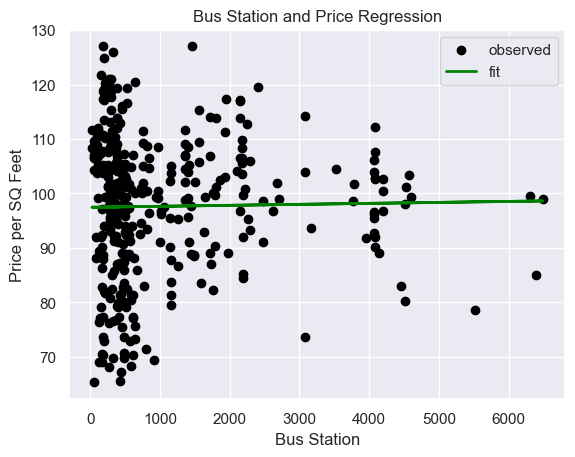

In [24]:
# E
# Linear Regression of Bus Station / Price
# split the data into train and test parts

train_df, test_df = train_test_split(data,shuffle = True, test_size = 0.15, random_state=17)

X = train_df['X3 bus station']
y = train_df['Y price sq feet']
# reshape(-1,1) makes the array horizontal, y is vertical
X3 = np.array(X).reshape(-1,1) 

# Train the model (we use all data for training --> 
model = sklearn.linear_model.LinearRegression()
model.fit(X3, y)
r_sq = model.score(X3, y)
print(r_sq)
plt.scatter(X3, y, color='black', label='observed')

plt.plot(X3, model.predict(X3), label='fit', color='Green', linewidth=2)

plt.xlabel('Bus Station')
plt.ylabel('Price per SQ Feet')
plt.title('Bus Station and Price Regression')
plt.legend(loc='best')

plt.show()